In [14]:
matplotlib inline

In [15]:
import pandas as pd

In [16]:
file="C:/Users/saint/DataspellProjects/corrosion_batch/Databases/"

In [17]:
corr_df = pd.read_csv(file+"corr_database_less_data.csv")

In [18]:
corr_df.head()

,BPPD,BAPD,Caudal_gas_MSCFD,Presion_cabeza_psi,Temperatura_cabeza_F,Salinidad_ppm,CO2_gas,bicarbonatos_ppm,dosis_IC_ppm,Fe_ppm,mpy
0,273.00,5187.00,120.0,160,220,76600,7,240,50,45.90,8.41626
1,306.90,251.10,33.0,180,130,74000,0,281,50,77.11,0.10024
2,30.00,970.00,51.0,200,192,73000,15,120,90,54.00,7.17844
3,311.64,324.36,28.0,210,160,36200,15,220,40,56.21,1.50500
4,412.48,4743.52,48.0,200,150,82200,20,400,40,54.80,0.71894


In [19]:
corr_df.describe()

,BPPD,BAPD,Caudal_gas_MSCFD,Presion_cabeza_psi,Temperatura_cabeza_F,Salinidad_ppm,CO2_gas,bicarbonatos_ppm,dosis_IC_ppm,Fe_ppm,mpy
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,381.881805,1802.848325,127.924156,165.857143,182.012987,42309.909091,10.688312,446.636364,59.623377,34.273961,2.493065
std,345.066978,1520.476985,124.992756,58.820359,35.367802,22067.353688,9.273987,310.737447,30.693750,18.754529,3.556521
min,30.000000,37.240000,10.500000,78.000000,80.000000,5000.000000,0.000000,100.000000,15.000000,3.600000,0.100240
25%,185.470000,439.280000,40.000000,130.000000,160.000000,25000.000000,5.000000,220.000000,40.000000,19.000000,0.676190
50%,286.830000,1537.900000,66.000000,160.000000,192.000000,43000.000000,7.000000,300.000000,50.000000,37.500000,1.618040
75%,403.000000,2830.100000,206.000000,195.000000,210.000000,60000.000000,15.000000,710.000000,70.000000,48.900000,2.716030
max,1883.250000,6666.480000,561.000000,400.000000,220.000000,82200.000000,40.000000,1290.000000,200.000000,77.110000,23.082550


In [20]:
from pycaret.regression import *

In [21]:
exp_clf01 = setup(data = corr_df, target = 'mpy', session_id = 123)

,Description,Value
0,session_id,123
1,Target,mpy
2,Original Data,"(77, 11)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(53, 41)"


Shape of your Data Set loaded: (77, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
BPPD,77,float64,0,0.000000,100.000000,0,"possible ID column: drop, skewed column: cap or drop possible outliers"
BAPD,77,float64,0,0.000000,100.000000,0,possible ID column: drop
Fe_ppm,70,float64,0,0.000000,90.909091,0,
Caudal_gas_MSCFD,68,float64,0,0.000000,88.311688,0,skewed column: cap or drop possible outliers
Salinidad_ppm,65,int64,0,0.000000,84.415584,0,
bicarbonatos_ppm,47,int64,0,0.000000,61.038961,0,
Temperatura_cabeza_F,39,int64,0,0.000000,50.649351,0,
Presion_cabeza_psi,35,int64,0,0.000000,45.454545,0,
CO2_gas,23,int64,0,0.000000,29.870130,0,
dosis_IC_ppm,16,int64,0,0.000000,20.779221,0,


    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################


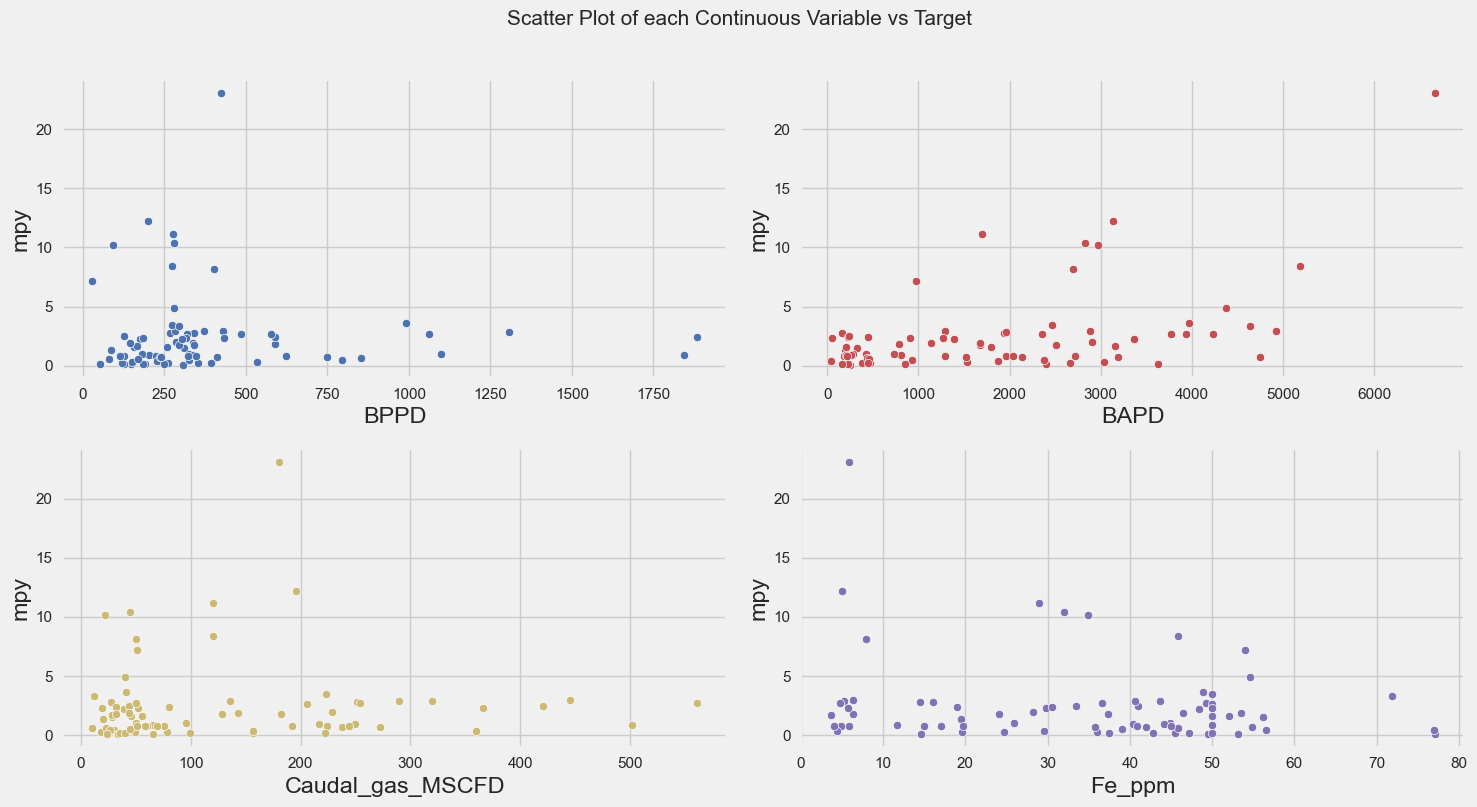

Number of All Scatter Plots = 10


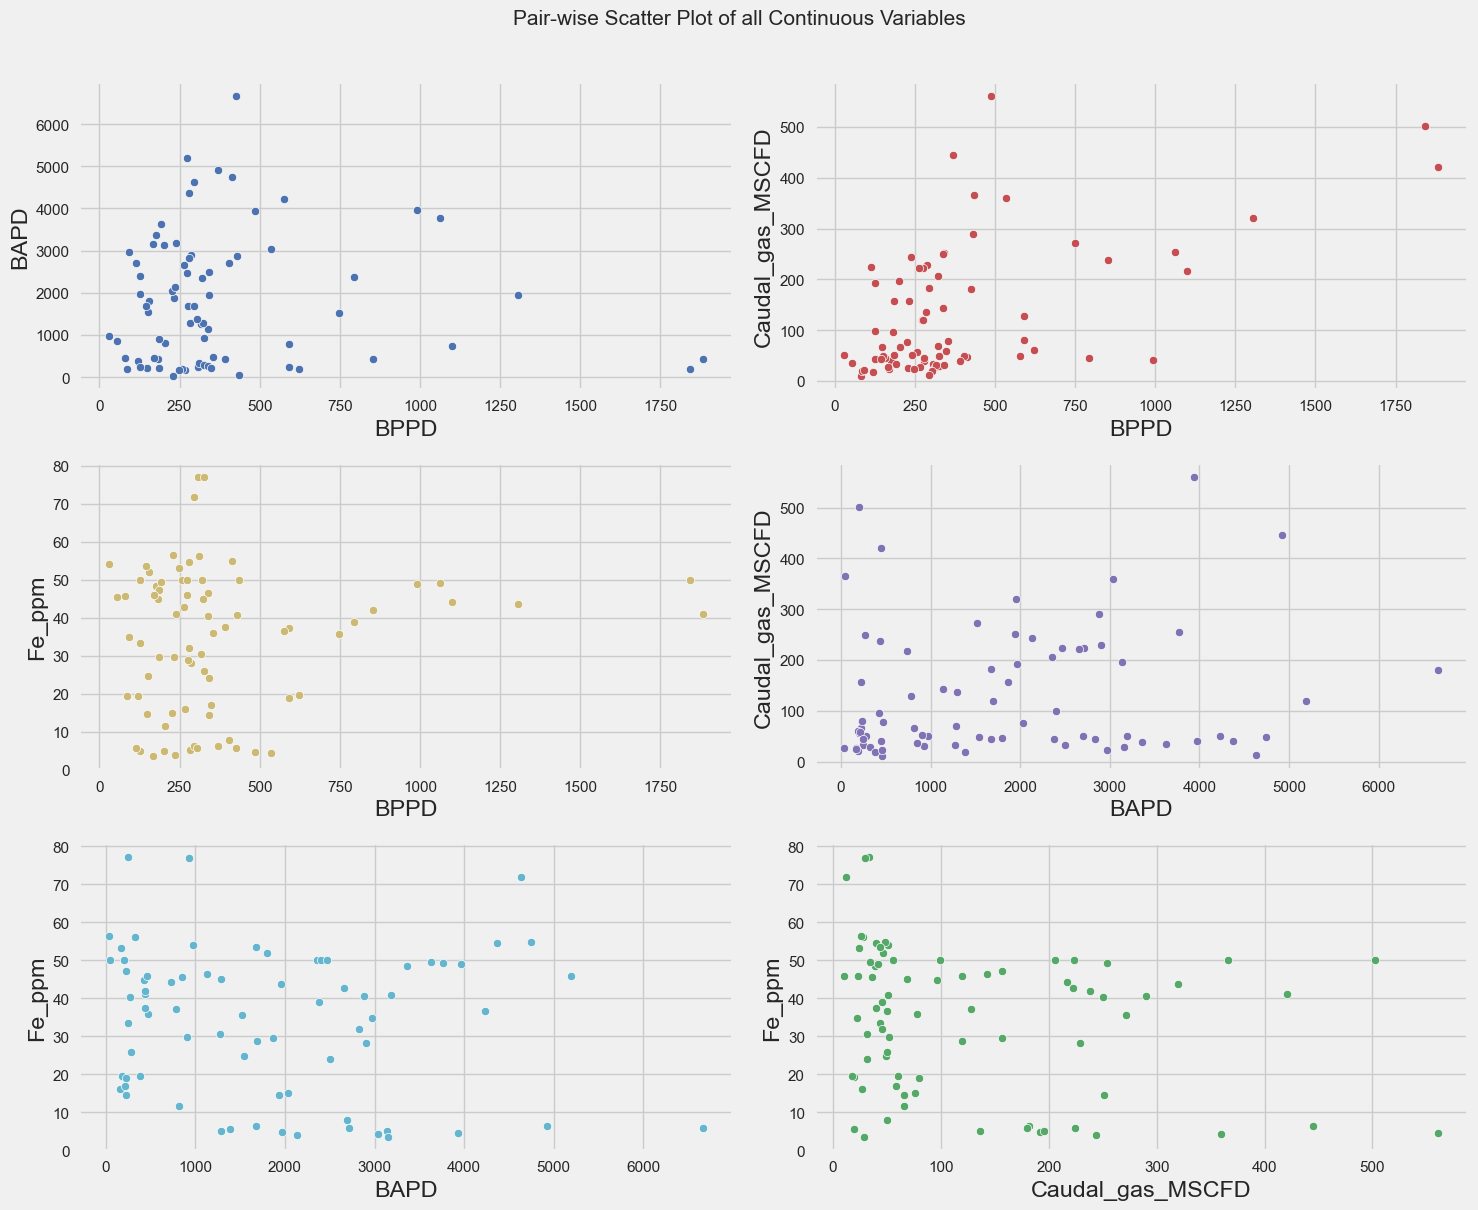

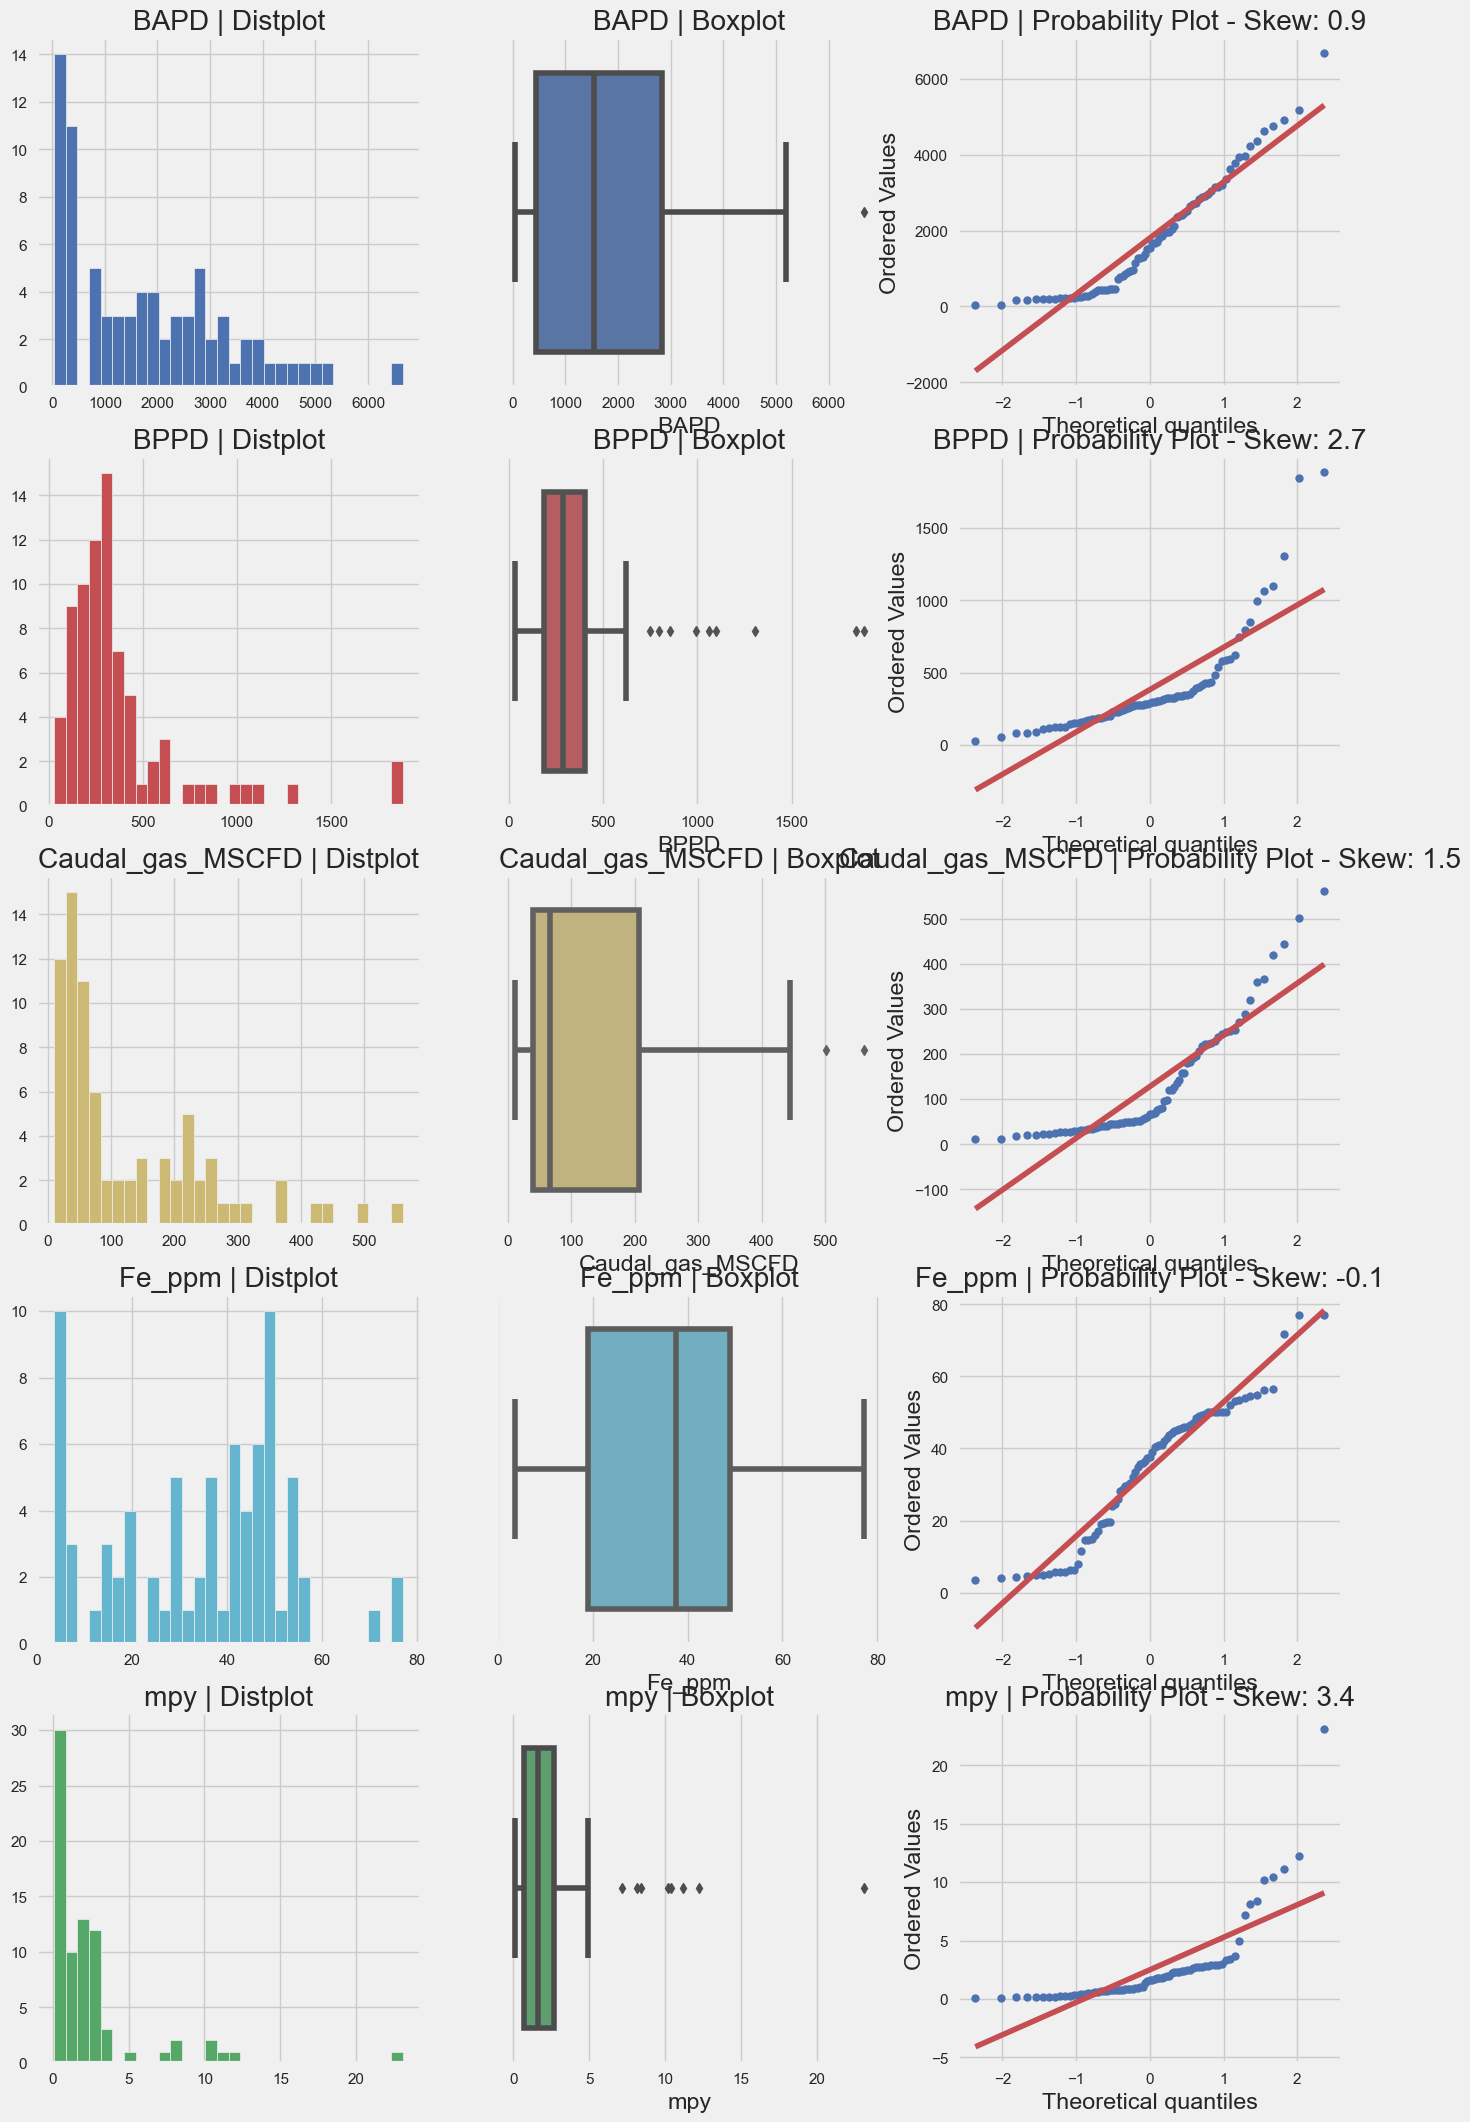

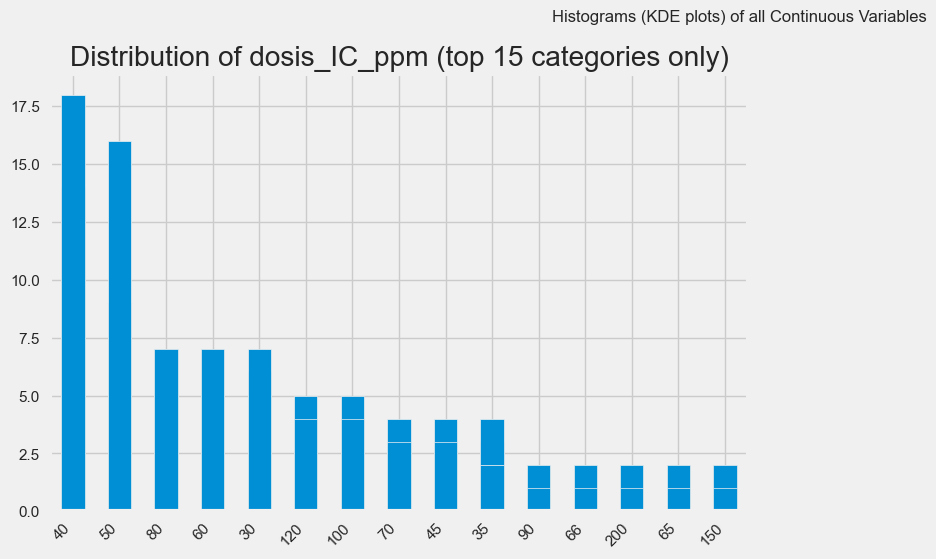

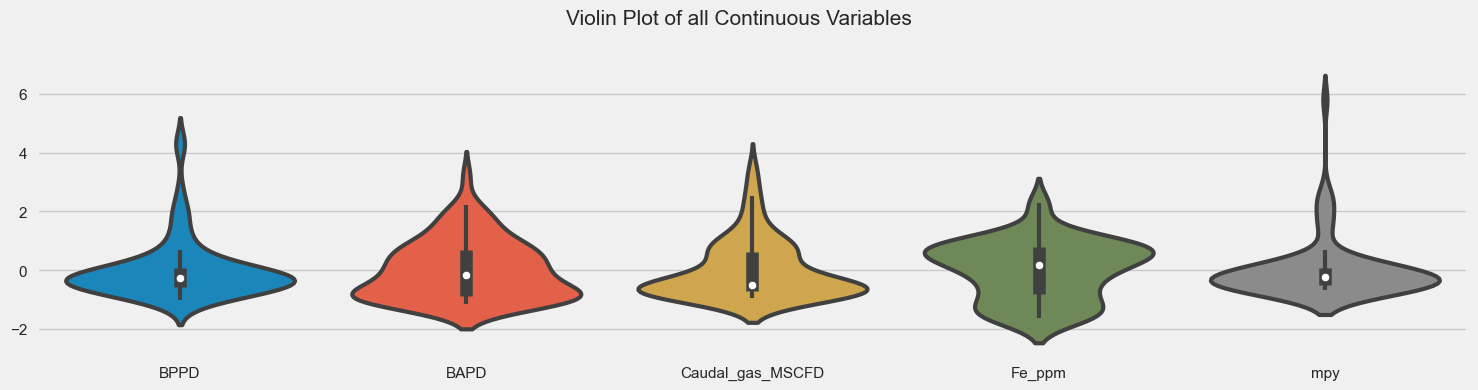

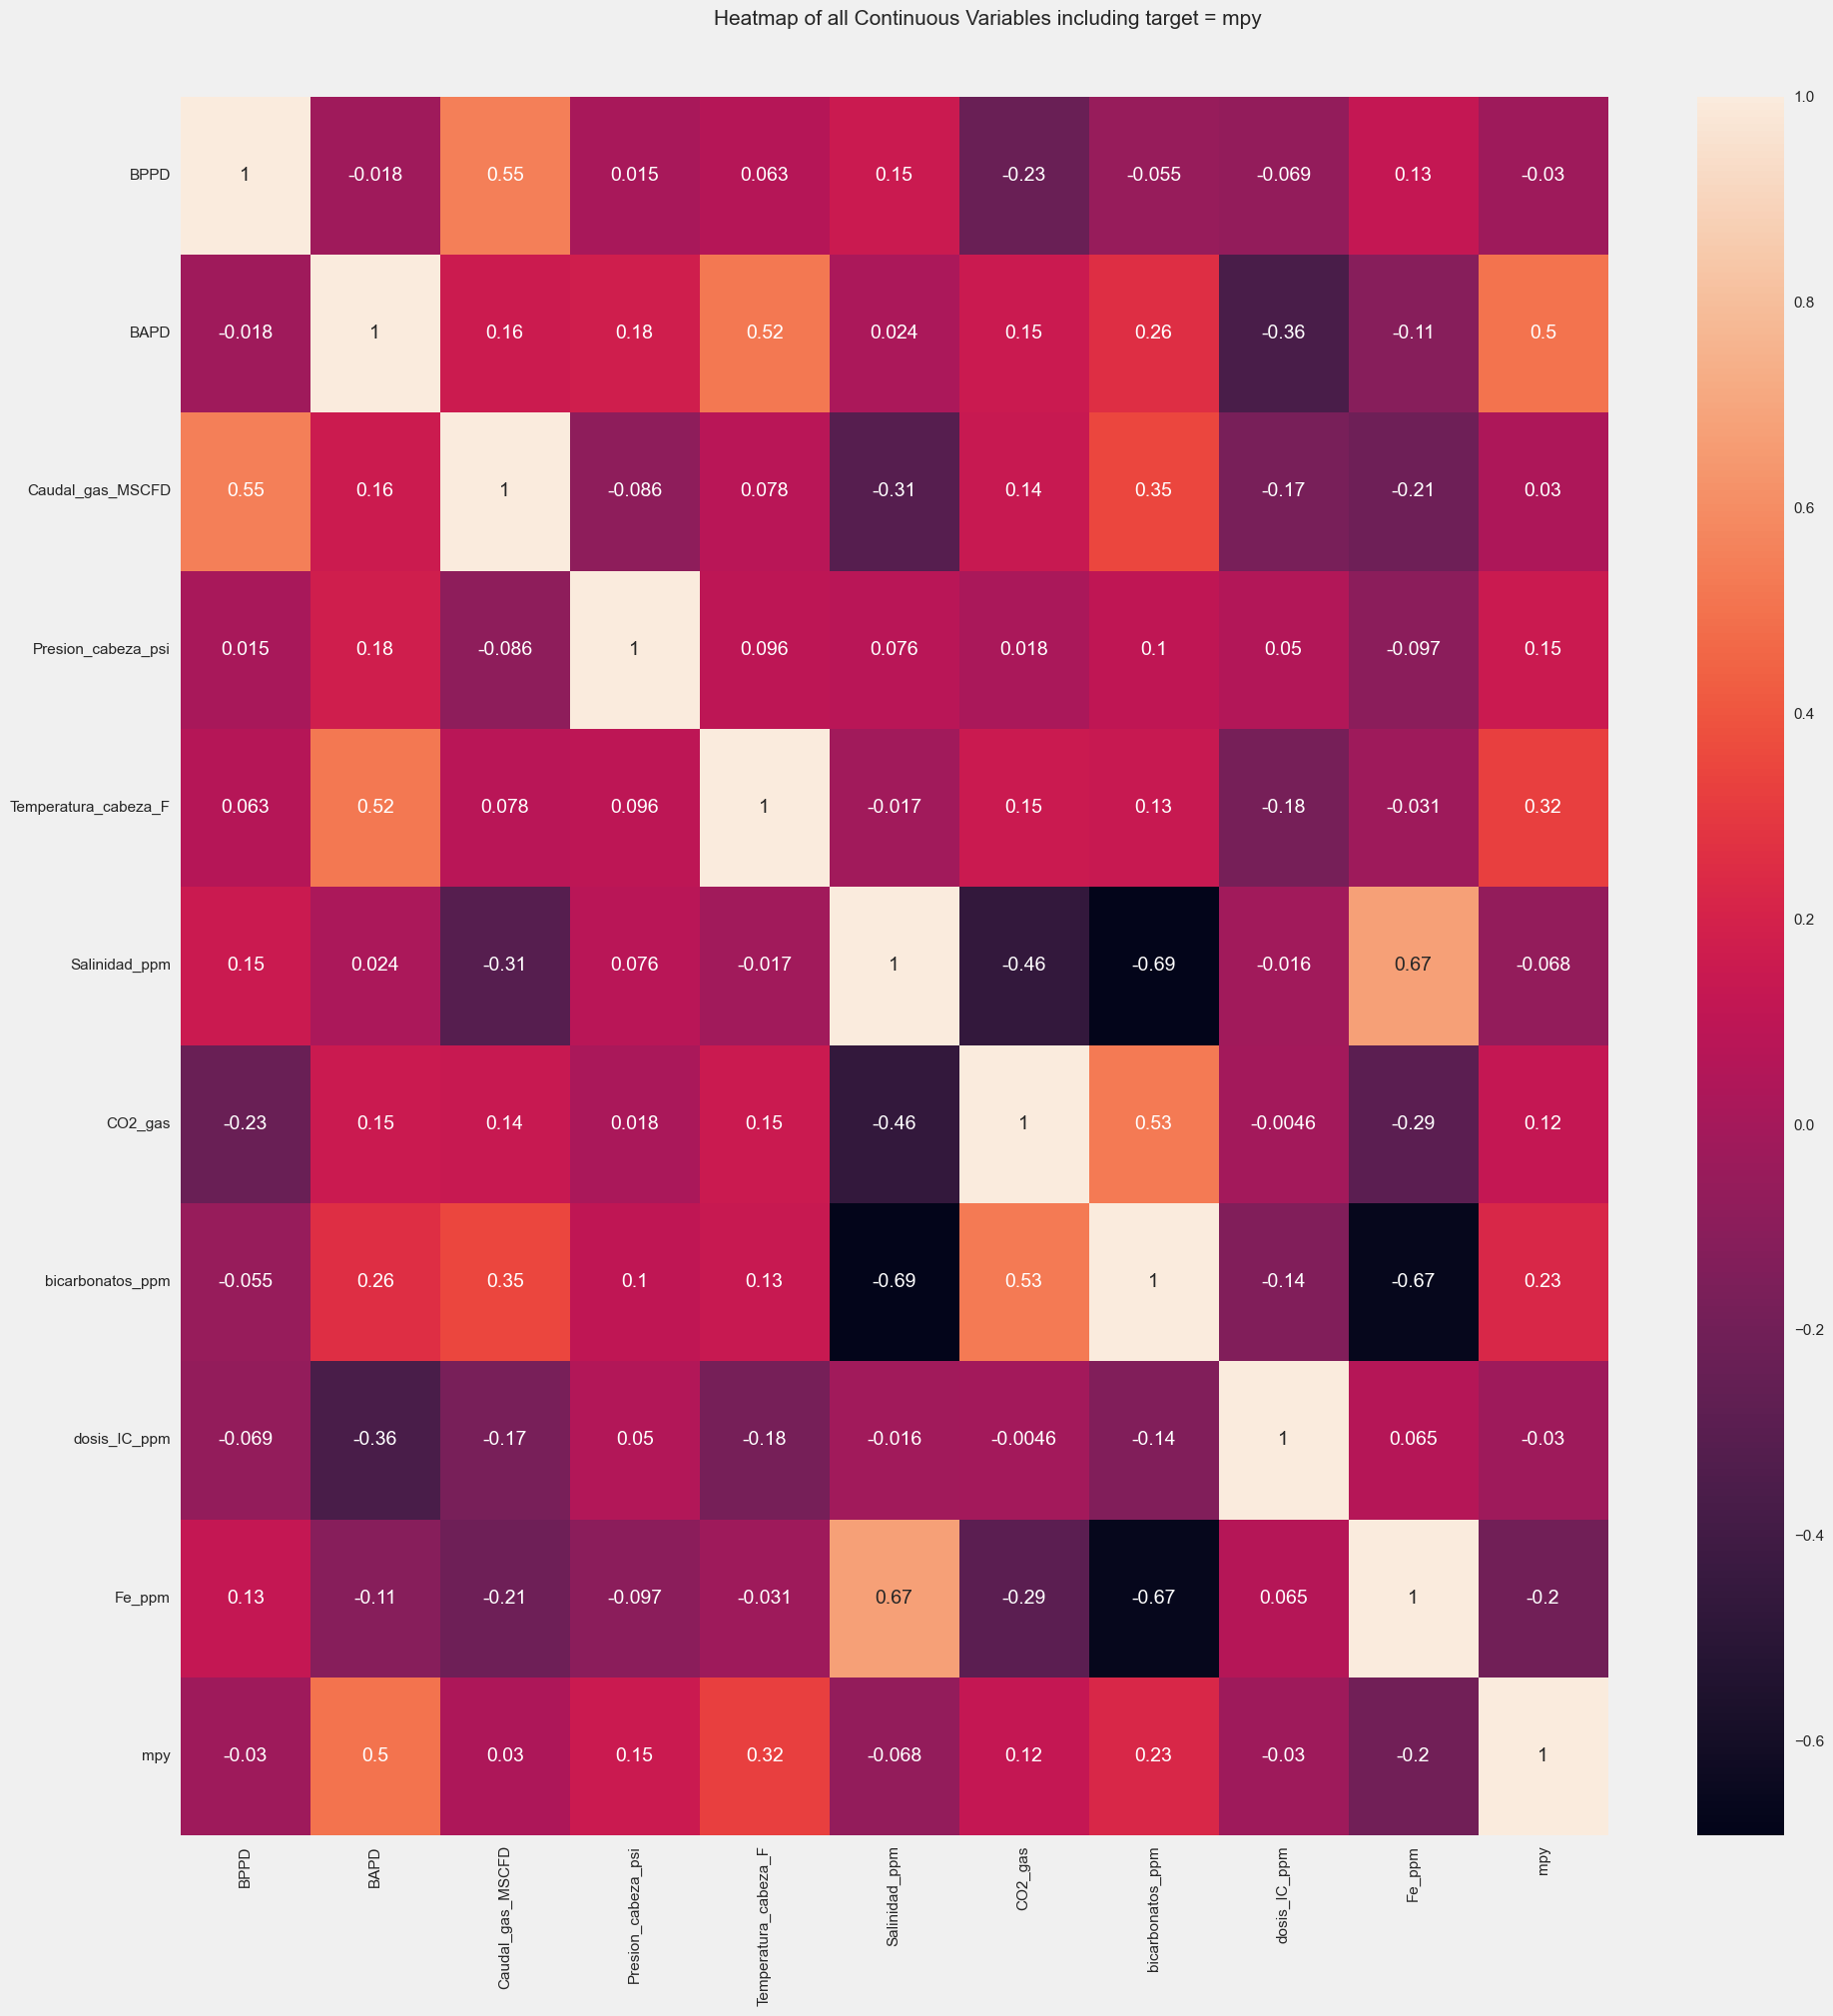

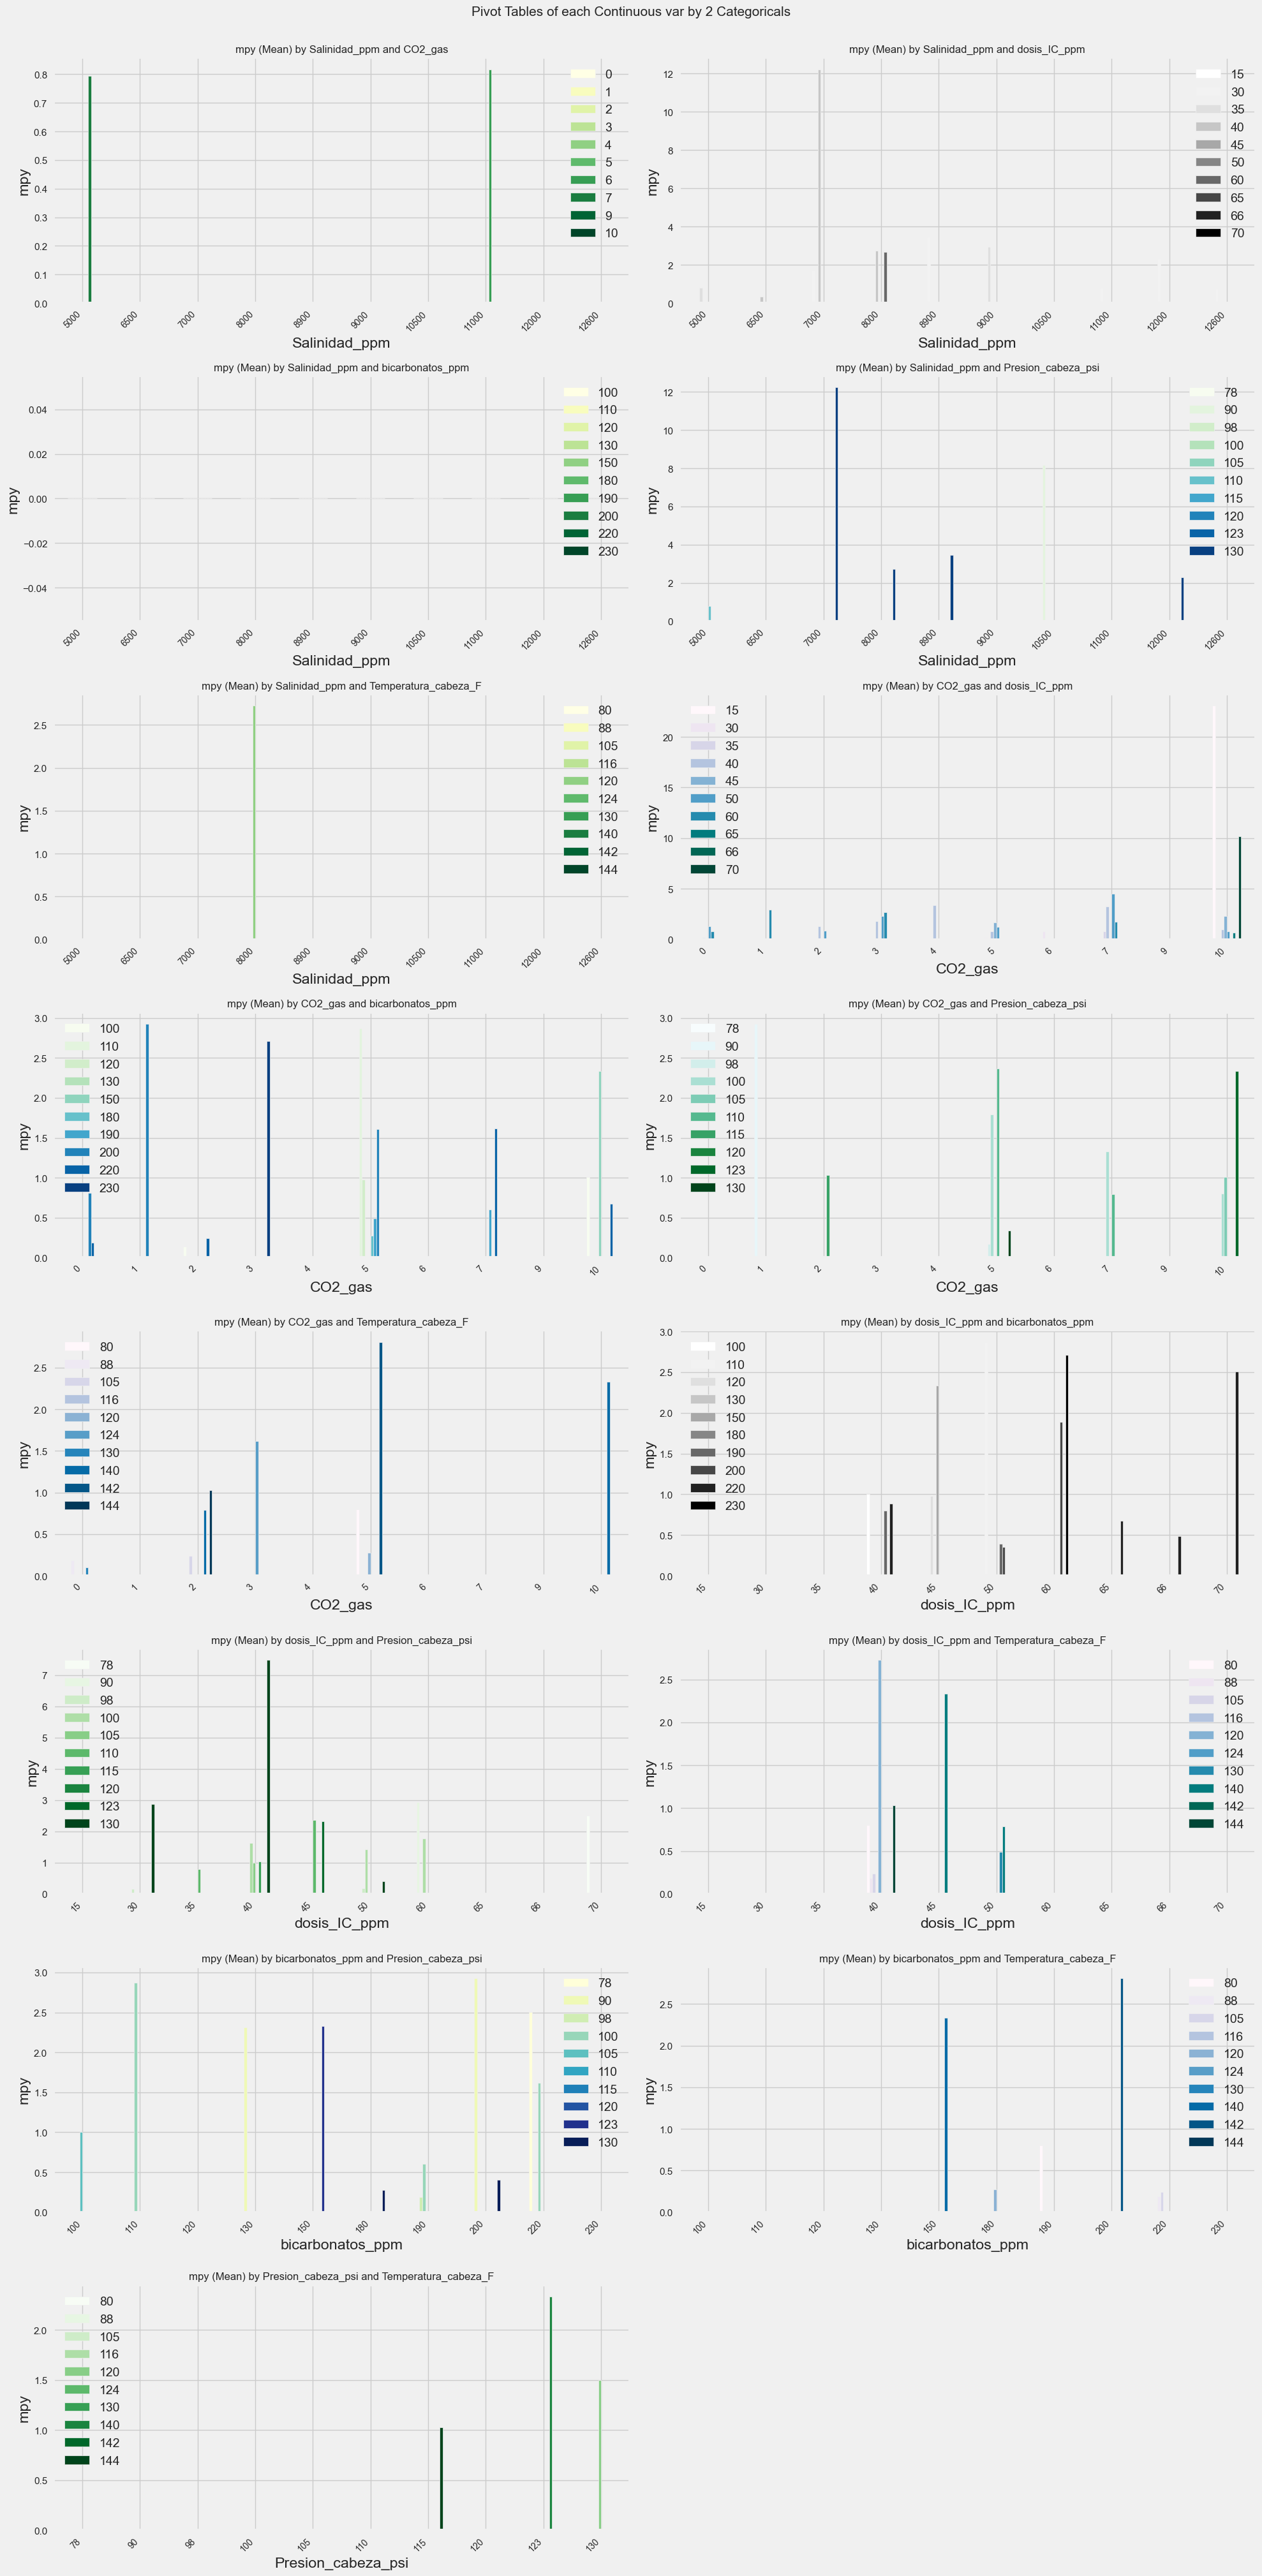

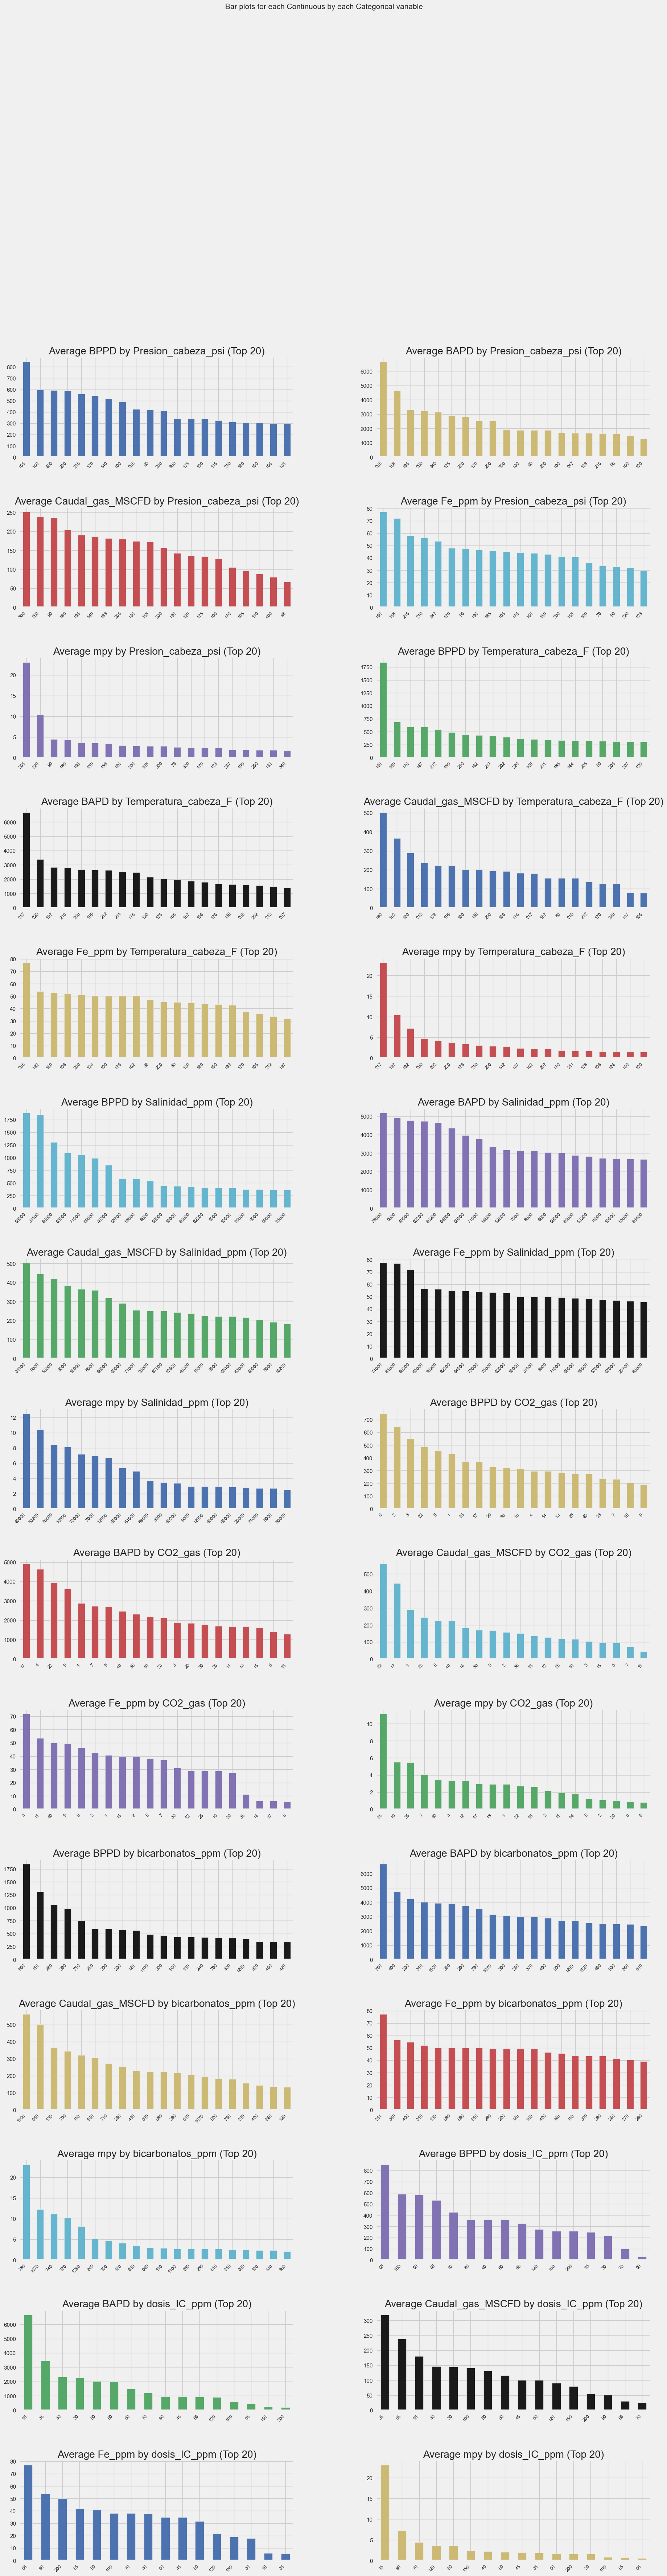

All Plots done
Time to run AutoViz = 30 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [22]:
eda(display_format = 'svg')

In [23]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1.8475,12.6130,2.7801,-1.6294,0.6225,2.1583,0.0260
br,Bayesian Ridge,2.1392,13.0460,3.0704,-4.6293,0.6918,3.1749,0.0180
omp,Orthogonal Matching Pursuit,1.8849,12.8348,2.9603,-5.4578,0.6408,2.1886,0.0190
lightgbm,Light Gradient Boosting Machine,2.3312,14.5604,3.1736,-6.9340,0.7207,3.1780,0.0340
et,Extra Trees Regressor,1.9029,13.0639,2.9234,-7.0897,0.6317,1.9883,0.1830
knn,K Neighbors Regressor,2.0798,16.2949,3.1389,-7.1295,0.6961,2.6130,0.0190
rf,Random Forest Regressor,2.0747,14.6287,3.1395,-7.2458,0.7198,2.9227,0.1600
lasso,Lasso Regression,2.4174,14.3415,3.2772,-7.2673,0.7250,3.4890,0.0220
en,Elastic Net,2.4352,14.3828,3.2913,-7.4035,0.7263,3.5106,0.0180
xgboost,Extreme Gradient Boosting,2.3387,17.6817,3.6003,-9.1374,0.8327,4.0408,0.1900


In [24]:
exp_clf102 = setup(data = corr_df, target = 'mpy',session_id=123,normalize = True)

,Description,Value
0,session_id,123
1,Target,mpy
2,Original Data,"(77, 11)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(53, 41)"


In [25]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1.9794,14.6742,2.9960,-4.0945,0.6769,2.4837,0.0550
knn,K Neighbors Regressor,2.0541,14.5181,3.0585,-4.4684,0.7051,2.6791,0.0140
lasso,Lasso Regression,2.0571,14.4486,2.9902,-4.4831,0.6952,3.2561,0.0100
en,Elastic Net,2.0262,13.6512,2.9686,-4.6956,0.6823,3.1417,0.0150
omp,Orthogonal Matching Pursuit,1.8849,12.8348,2.9603,-5.4578,0.6408,2.1886,0.0170
lightgbm,Light Gradient Boosting Machine,2.3057,14.6197,3.1745,-6.8389,0.7154,3.1609,0.0220
et,Extra Trees Regressor,1.9029,13.0639,2.9234,-7.0897,0.6317,1.9883,0.1150
rf,Random Forest Regressor,2.0735,14.6347,3.1400,-7.2487,0.7202,2.9230,0.1310
xgboost,Extreme Gradient Boosting,2.3387,17.6811,3.6003,-9.1379,0.8327,4.0405,0.1040
dt,Decision Tree Regressor,2.8093,26.2376,4.3829,-9.2434,0.8667,3.1777,0.0110


In [26]:
huber_model = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.5874,30.2490,5.4999,-0.5716,1.1109,2.6872
1,3.8255,20.0458,4.4773,-25.0181,1.0119,8.2051
2,3.1224,12.0329,3.4688,-0.5969,0.8563,3.5498
3,3.0439,16.3830,4.0476,-127.9059,1.0544,4.5338
4,1.8074,7.2824,2.6986,0.2010,0.6868,2.7707
5,5.5154,52.5616,7.2499,0.3232,0.8933,4.4785
6,2.3075,7.0474,2.6547,-3.3389,0.9825,7.5674
7,4.3582,25.2683,5.0268,-3.7754,0.9642,1.6811
8,2.9816,14.6647,3.8295,-45.0203,1.0710,6.4679


In [27]:
tuned_model=tune_model(huber_model,n_iter = 50,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.4466,27.2331,5.2185,-0.4149,1.0130,1.0698
1,2.3800,7.3745,2.7156,-8.5716,0.8300,4.9279
2,2.1897,8.3083,2.8824,-0.1026,0.7482,2.8381
3,0.8074,1.0209,1.0104,-7.0325,0.3751,1.3521
4,1.7199,9.0730,3.0121,0.0046,0.6672,1.1280
5,5.1538,75.2820,8.6765,0.0307,0.8368,1.8502
6,1.5991,2.9822,1.7269,-0.8361,0.7465,4.0805
7,2.4083,11.0837,3.3292,-1.0947,1.0227,0.9295
8,0.8897,1.3996,1.1830,-3.3921,0.5068,1.9591


In [28]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
dashboard(tuned_model)

ImportError: It appears that explainerdashboard library is not installed. Do: pip install explainerdashboard

In [66]:
#import deepchecks

In [67]:
#deep_check(tuned_model)

In [31]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,2.2031,10.0255,3.1663,-0.2294,0.7428,1.1608


,BPPD,BAPD,Caudal_gas_MSCFD,Presion_cabeza_psi,Temperatura_cabeza_F,Salinidad_ppm,bicarbonatos_ppm,Fe_ppm,CO2_gas_0,CO2_gas_1,...,dosis_IC_ppm_45,dosis_IC_ppm_50,dosis_IC_ppm_60,dosis_IC_ppm_65,dosis_IC_ppm_66,dosis_IC_ppm_70,dosis_IC_ppm_80,dosis_IC_ppm_90,mpy,Label
0,-0.389840,0.296706,-0.372258,-1.233341,-0.043085,-0.388329,0.347638,-1.122963,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80521,2.446120
1,-0.586969,1.048568,-0.769322,3.473560,0.886247,-1.694124,2.202917,-1.760997,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.69926,3.363643
2,0.760682,1.772433,-0.588922,0.727868,1.151770,0.820741,-0.643976,0.085942,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.71055,4.466996
3,0.220756,2.115484,-0.605556,0.727868,-0.706893,1.942758,-0.100187,1.104557,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.71894,3.557678
4,0.293590,-1.038299,2.039318,-1.429462,-0.388265,-1.258859,-0.963852,0.835912,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.31148,-1.453310
5,-0.632727,-0.037733,-0.597239,-0.448858,0.886247,-0.001426,-0.739939,-0.580075,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29920,0.903963
6,-0.202019,-0.203241,0.126359,-0.841100,0.833142,-1.408784,1.307265,-1.671449,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.93174,0.231587
7,-0.354439,0.361996,1.024618,0.629807,0.886247,-1.423293,1.147327,-1.738610,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74967,0.269503
8,-0.216770,1.865262,-0.672094,0.237565,1.151770,1.086737,-0.388076,1.096722,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.92600,3.254041
9,-0.344736,1.070667,-0.583099,0.629807,0.886247,0.520892,-0.228138,0.326604,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.76563,2.620370


In [84]:
save_model(tuned_model, model_name = 'corrosion_regressor_less_data_norm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['dosis_IC_ppm',
                                                           'CO2_gas'],
                                       target='mpy', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=N...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='mpy')),
                 ('fix_perfect', Remove_100(target='mpy')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'pa